In [1]:
!pip uninstall -y nltk
!pip install nltk


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.7 MB/s eta 0:00:00


In [2]:
import nltk

# These are the correct official resources – DO NOT include 'punkt_tab'
nltk.download('punkt')         # Sentence/word tokenizer
nltk.download('stopwords')     # Stopwords for English
nltk.download('wordnet')       # WordNet for lemmatization
nltk.download('omw-1.4')       # WordNet extension


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Make sure you download required data (excluding punkt!)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase and split (simple tokenization)
    tokens = text.lower().split()

    # Remove punctuation and stopwords
    tokens = [word.strip(string.punctuation) for word in tokens if word not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

# Sample data
df = pd.DataFrame({
    'text': ["This is a sample sentence.", "NLTK is a great tool for text processing!"]
})

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)
df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text,cleaned_text
0,This is a sample sentence.,sample sentence
1,NLTK is a great tool for text processing!,nltk great tool text processing


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('cleaned_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cleaned_text'].value_counts()
    for x_label, grp in df.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('cleaned_text')

In [5]:
import pandas as pd

# Sample dataset for Task 4 (use your actual dataset if available)
data = {
    'text': [
        "I love this product! It's absolutely amazing.",
        "Worst experience ever. Will not recommend.",
        "It was okay, not the best but not the worst.",
        "Fantastic service and friendly staff!",
        "Terrible quality. Completely disappointed."
    ]
}
df = pd.DataFrame(data)


In [7]:
import re
import string
from nltk.corpus import stopwords

# No need for word_tokenize anymore
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    # Tokenize by splitting on whitespace
    tokens = text.split()

    # Remove stopwords
    cleaned = [word for word in tokens if word not in stop_words]

    return ' '.join(cleaned)


In [8]:
df['cleaned_text'] = df['text'].apply(preprocess_text)
df.head()


,text,cleaned_text
0,I love this product! It's absolutely amazing.,love product absolutely amazing
1,Worst experience ever. Will not recommend.,worst experience ever recommend
2,"It was okay, not the best but not the worst.",okay best worst
3,Fantastic service and friendly staff!,fantastic service friendly staff
4,Terrible quality. Completely disappointed.,terrible quality completely disappointed


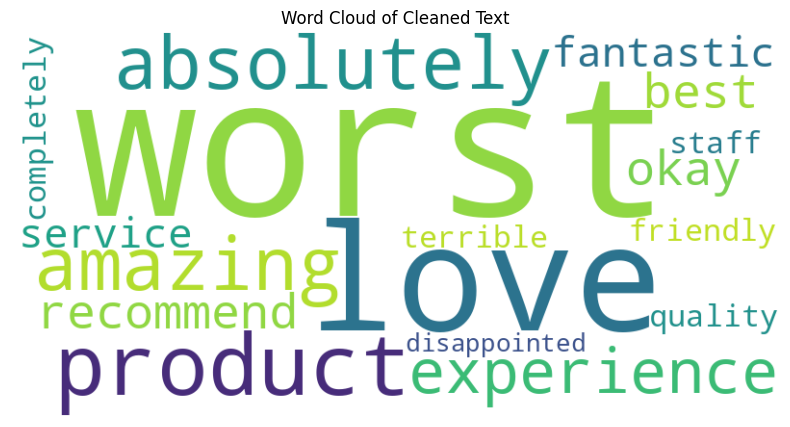

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text into one string
text_data = ' '.join(df['cleaned_text'])

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text')
plt.show()


In [10]:
pip install textblob


In [11]:
from textblob import TextBlob

# Define sentiment function
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to cleaned text
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# View results
df[['text', 'cleaned_text', 'sentiment']].head()


,text,cleaned_text,sentiment
0,I love this product! It's absolutely amazing.,love product absolutely amazing,Positive
1,Worst experience ever. Will not recommend.,worst experience ever recommend,Negative
2,"It was okay, not the best but not the worst.",okay best worst,Positive
3,Fantastic service and friendly staff!,fantastic service friendly staff,Positive
4,Terrible quality. Completely disappointed.,terrible quality completely disappointed,Negative


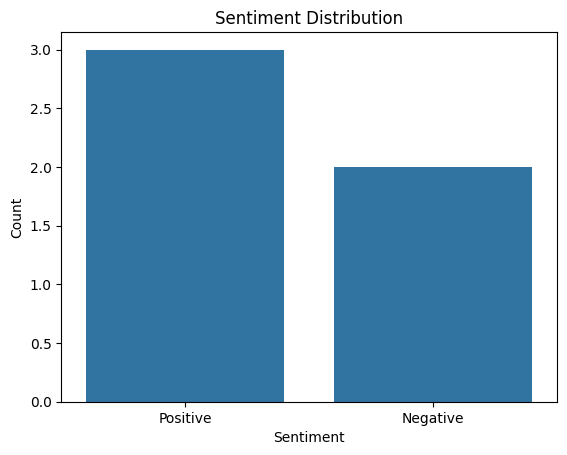

In [12]:
import seaborn as sns

sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
